# Optimization through Data Mining

## 1. Customer Segmentation

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [80]:
data = pd.read_csv('LTV Tagged Customers.csv')

In [81]:
data.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,...,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,LTV_Segment
0,0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,...,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes,Low
1,1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,...,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes,Low
2,2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,...,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes,Low
3,3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,...,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes,Low
4,4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,...,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes,High


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   CustomerID        7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   State             7032 non-null   object 
 7   Latitude          7032 non-null   float64
 8   Longitude         7032 non-null   float64
 9   ZipCode           7032 non-null   int64  
 10  PhoneService      7032 non-null   object 
 11  MultipleLines     7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


In [83]:
# Preprocessing
# Drop columns that won't be used in clustering
data.drop(['Unnamed: 0', 'CustomerID', 'Latitude', 'Longitude', 'ZipCode', 'State'], axis=1, inplace=True)

In [84]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,LTV_Segment
0,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes,Low
1,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,...,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes,Low
2,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes,Low
3,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes,Low
4,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes,High


In [85]:
# Encode categorical variables
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])
    print("Column :", column)
    print("Encoded values:", data[column].unique())
    print("Inverse transform:", le.inverse_transform(data[column].unique()))
    print("\n")

Column : Gender
Encoded values: [1 0]
Inverse transform: ['Male' 'Female']


Column : SeniorCitizen
Encoded values: [0 1]
Inverse transform: ['No' 'Yes']


Column : Partner
Encoded values: [0 1]
Inverse transform: ['No' 'Yes']


Column : Dependents
Encoded values: [0 1]
Inverse transform: ['No' 'Yes']


Column : PhoneService
Encoded values: [1 0]
Inverse transform: ['Yes' 'No']


Column : MultipleLines
Encoded values: [0 2 1]
Inverse transform: ['No' 'Yes' 'No phone service']


Column : InternetService
Encoded values: [0 1 2]
Inverse transform: ['DSL' 'Fiber optic' 'No']


Column : OnlineSecurity
Encoded values: [2 0 1]
Inverse transform: ['Yes' 'No' 'No internet service']


Column : OnlineBackup
Encoded values: [2 0 1]
Inverse transform: ['Yes' 'No' 'No internet service']


Column : DeviceProtection
Encoded values: [0 2 1]
Inverse transform: ['No' 'Yes' 'No internet service']


Column : TechSupport
Encoded values: [0 2 1]
Inverse transform: ['No' 'Yes' 'No internet service']


Column 

In [86]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [87]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

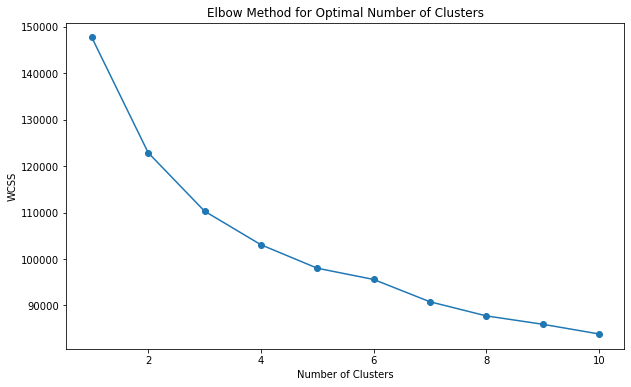

In [88]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method graph shows a significant bend at 4 clusters. This point is generally considered the "elbow," which indicates that the optimal number of clusters is 4. This means that adding more clusters beyond this point yields diminishing returns in terms of the reduction in WCSS (Within-Cluster Sum of Squares).

In [89]:
# Fit KMeans with the optimal number of clusters
optimal_clusters = 4  # Choose based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

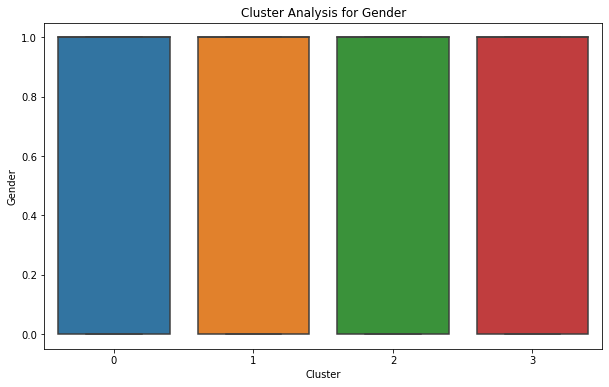

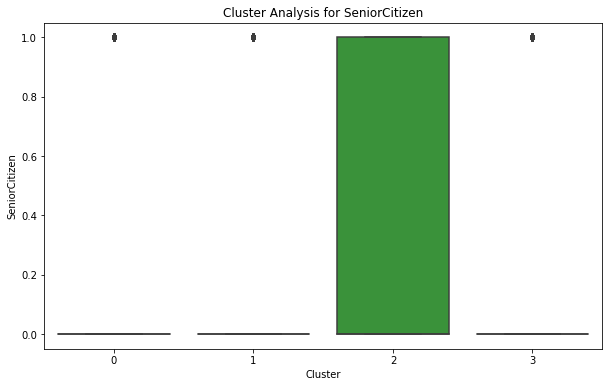

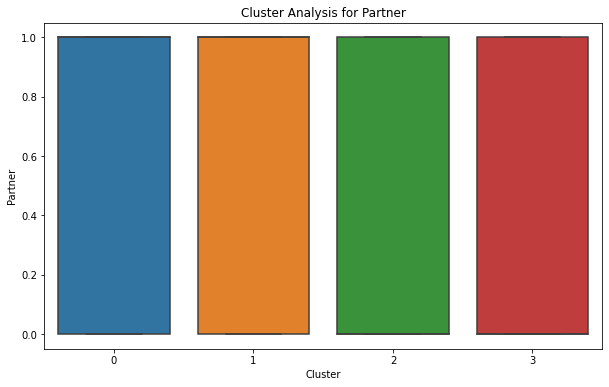

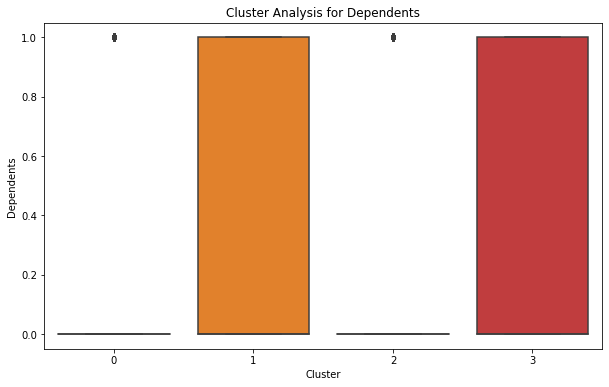

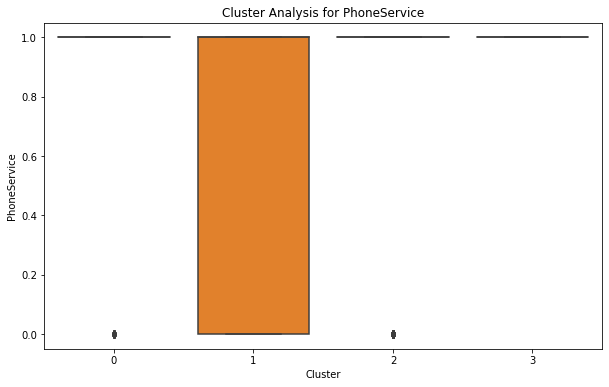

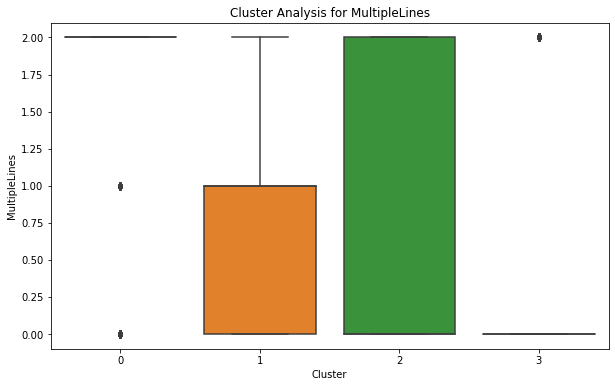

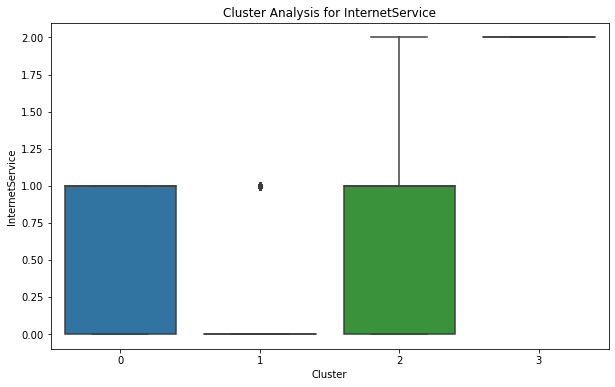

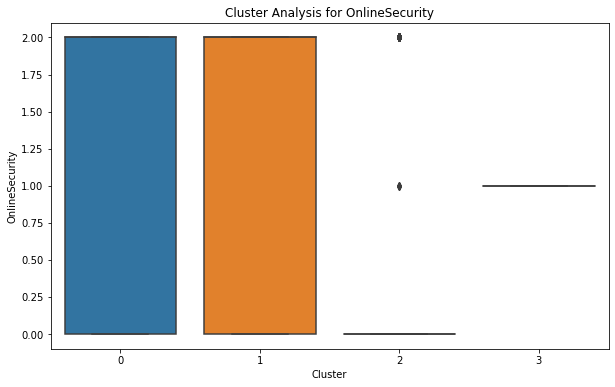

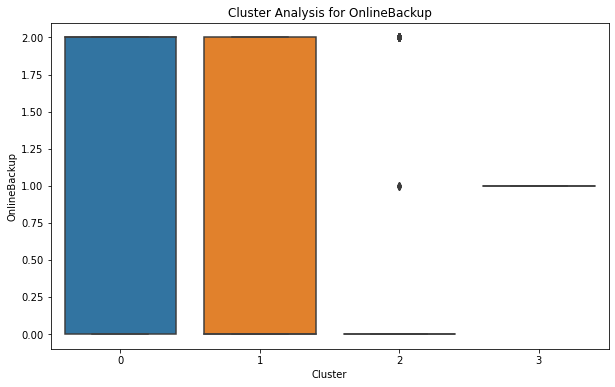

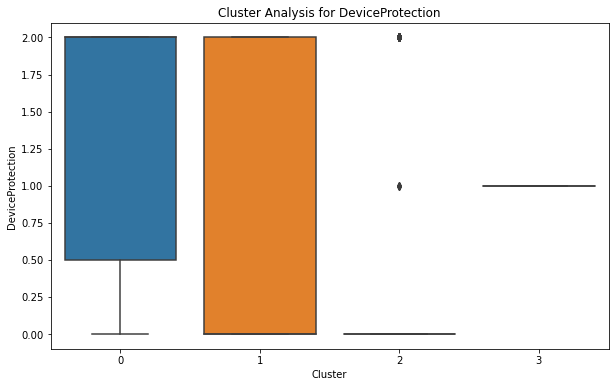

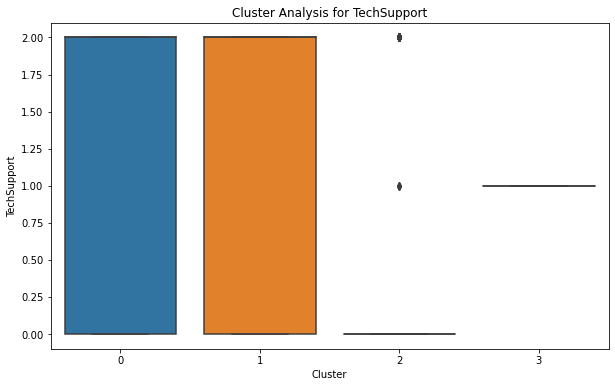

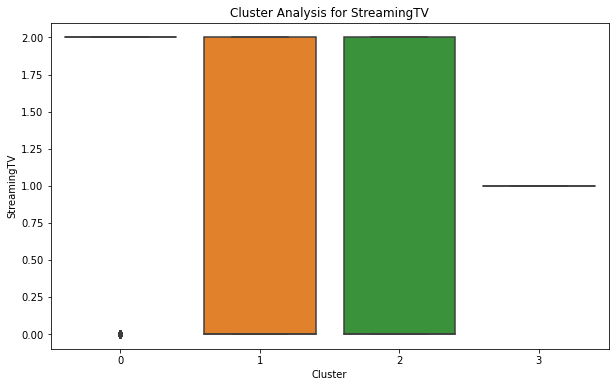

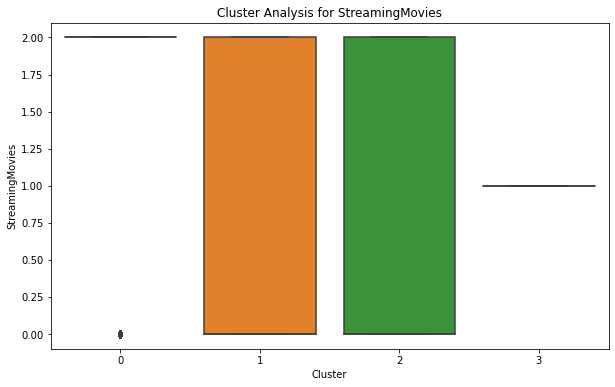

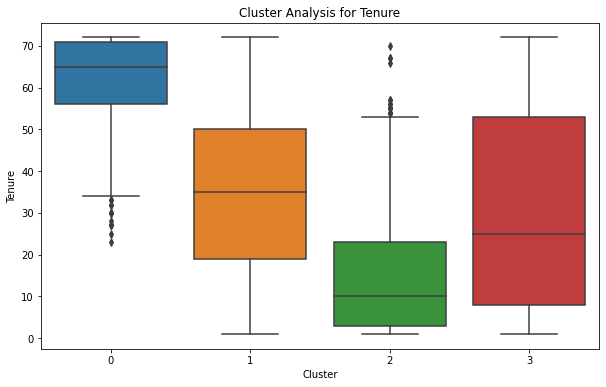

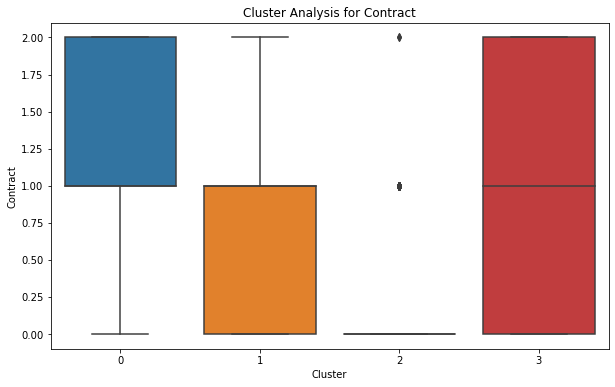

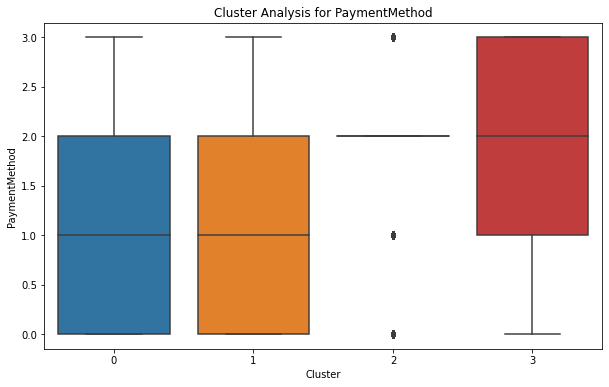

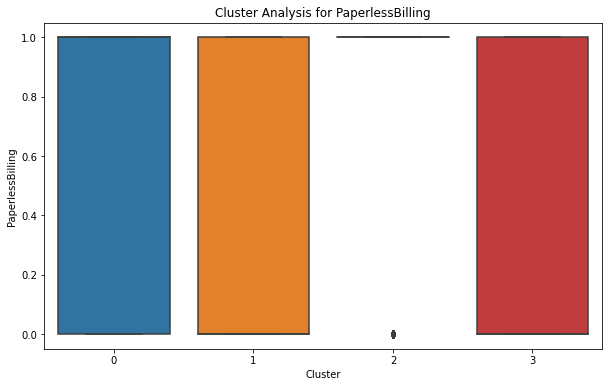

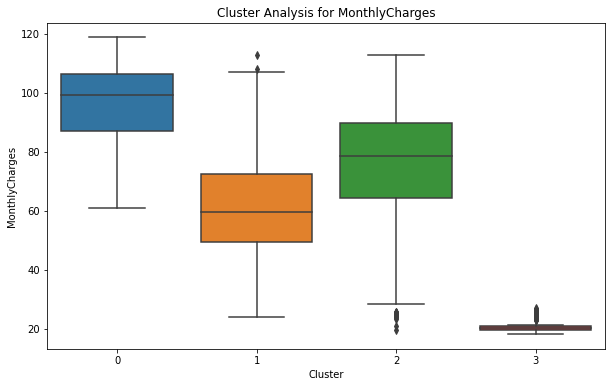

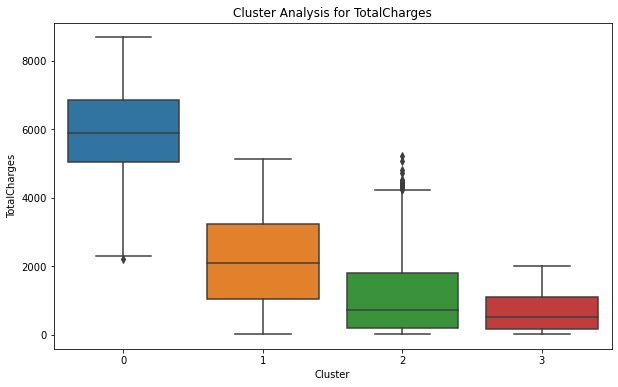

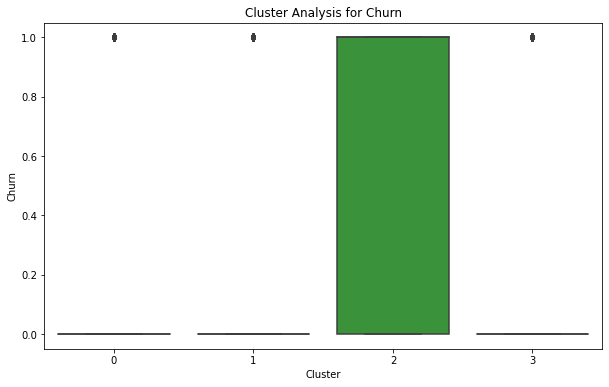

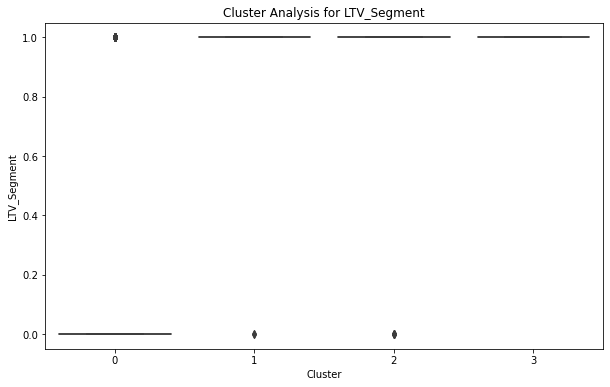

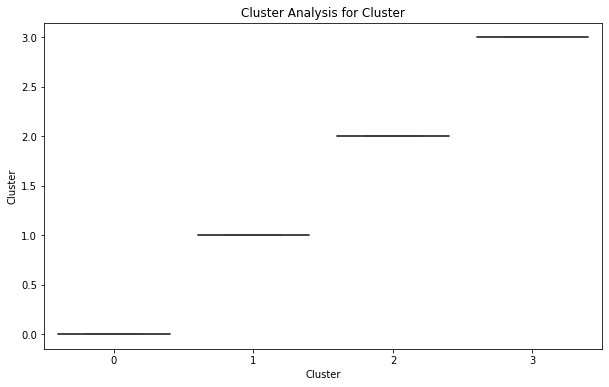

In [90]:
# Analyze and visualize the clusters
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'Cluster Analysis for {column}')
    plt.show()

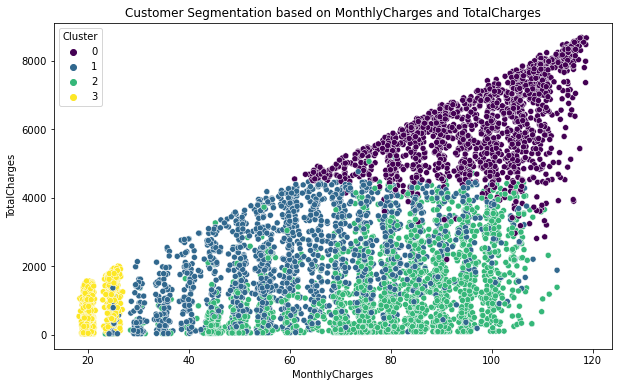

In [91]:
# Visualize clusters for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on MonthlyCharges and TotalCharges')
plt.show()


- Cluster Yellow: These customers have the lowest MonthlyCharges and TotalCharges. They likely subscribe to basic plans with minimal additional services.
- Cluster Blue: These customers have moderate MonthlyCharges and TotalCharges. They might be using mid-range plans or a combination of basic and some premium services.
- Cluster Green: These customers fall in the higher middle range for MonthlyCharges and TotalCharges. They probably use more premium services and have higher usage.
- Cluster Purple: These customers have the highest MonthlyCharges and TotalCharges. They are likely the most valuable customers, subscribing to the highest tier plans with multiple additional services.

In [92]:
# Define cluster names based on their characteristics
cluster_names = {
    0: 'High-Value Customers',
    1: 'Low-Value Customers',
    2: 'Loyal Customers',
    3: 'New Customers'
}

# Map the cluster labels to names
data['ClusterName'] = data['Cluster'].map(cluster_names)

In [96]:
round(data['ClusterName'].value_counts()/data.shape[0]*100,2)

Loyal Customers         35.45
Low-Value Customers     21.91
New Customers           21.56
High-Value Customers    21.08
Name: ClusterName, dtype: float64

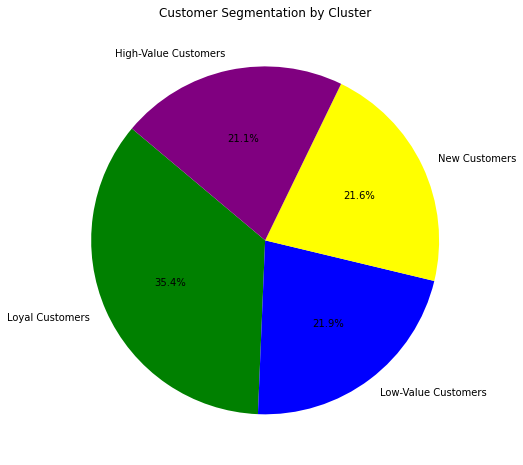

In [102]:
# Calculate the percentage of each cluster
cluster_percentage = round(data['ClusterName'].value_counts() / data.shape[0] * 100, 2)

# Draw the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentage, labels=cluster_percentage.index, autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'yellow', 'purple'])
plt.title('Customer Segmentation by Cluster')
plt.show()


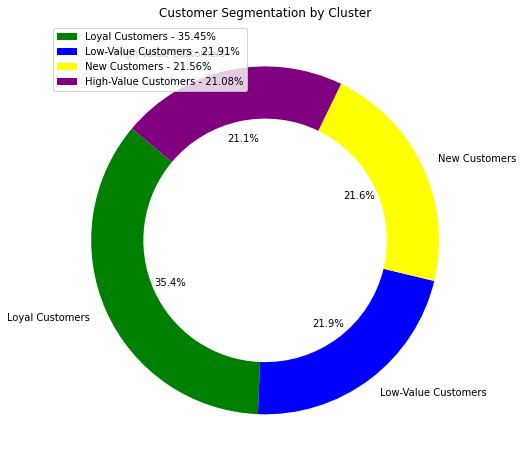

In [109]:
import matplotlib.pyplot as plt

# Calculate the percentage of each cluster
cluster_percentage = round(data['ClusterName'].value_counts() / data.shape[0] * 100, 2)

# Draw the pie chart with percentages outside the slices
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentage, labels=cluster_percentage.index, autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'yellow', 'purple'], wedgeprops=dict(width=0.3))

# Add a legend with percentages
plt.legend(labels=[f'{index} - {value}%' for index, value in zip(cluster_percentage.index, cluster_percentage)], loc='best')

plt.title('Customer Segmentation by Cluster')
plt.show()


Recommendations for Low-Value Customers:
- Upsell Opportunities: Introduce these customers to higher-tier plans by highlighting the benefits and additional services they can get.
- Targeted Promotions: Offer discounts or bundled packages to make higher-tier plans more attractive.

Recommendations for Moderate-Value Customers:
- Cross-Sell Opportunities: Encourage these customers to add on services that are commonly used by Cluster 2 and Cluster 3 customers, such as streaming services, device protection, or tech support.
- Customer Education: Provide information on how upgrading their plan can lead to better value and experience.

Recommendations for High Middle-Value Customers:
- Loyalty Programs: Introduce loyalty programs to retain these high-value customers by offering them rewards for continued patronage.
- Personalized Offers: Provide personalized offers based on their usage patterns to ensure they feel valued and are getting the best deal.

Recommendations for High-Value Customers:
- Exclusive Benefits: Offer exclusive benefits such as premium customer support, early access to new services, or special discounts to maintain their loyalty.
- Feedback Loop: Regularly solicit feedback from these customers to ensure their needs are being met and to quickly address any issues they may encounter.

In [45]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,LTV_Segment,Cluster,ClusterName
0,1,0,0,0,1,0,0,2,2,0,...,2,0,3,1,53.85,108.15,1,1,2,Loyal Customers
1,0,0,0,1,1,0,1,0,0,0,...,2,0,2,1,70.70,151.65,1,1,2,Loyal Customers
2,0,0,0,1,1,2,1,0,0,2,...,8,0,2,1,99.65,820.50,1,1,2,Loyal Customers
3,0,0,1,1,1,2,1,0,0,2,...,28,0,2,1,104.80,3046.05,1,1,2,Loyal Customers
4,1,0,0,1,1,2,1,0,2,2,...,49,0,0,1,103.70,5036.30,1,0,0,High-Value Customers


In [46]:
# Save the clustered data
data.to_csv('clustered_customers.csv', index=False)

# 2. Optimizing Customer Retention

Apriori algorithm is more effective in identifying combinations of services/products that are frequently used together, which can be leveraged for cross-selling and up-selling strategies.

In [47]:
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('LTV Tagged Customers.csv')

In [48]:
# Select relevant columns for market basket analysis
basket_data = data[['CustomerID', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies']]

In [49]:
# Convert categorical columns to boolean columns
basket_encoded = basket_data.applymap(lambda x: True if x == 'Yes' else False)

In [50]:
# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

In [51]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [52]:
# Display top 10 association rules
print(rules.head(10))

          antecedents         consequents  antecedent support  \
0      (PhoneService)     (MultipleLines)            0.903299   
1     (MultipleLines)      (PhoneService)            0.421928   
2    (OnlineSecurity)     (MultipleLines)            0.286547   
3     (MultipleLines)    (OnlineSecurity)            0.421928   
4      (OnlineBackup)     (MultipleLines)            0.344852   
5     (MultipleLines)      (OnlineBackup)            0.421928   
6  (DeviceProtection)     (MultipleLines)            0.343857   
7     (MultipleLines)  (DeviceProtection)            0.421928   
8       (TechSupport)     (MultipleLines)            0.290102   
9     (MultipleLines)       (TechSupport)            0.421928   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.421928  0.421928    0.467097  1.107053  0.040801    1.084760   
1            0.903299  0.421928    1.000000  1.107053  0.040801         inf   
2            0.421928  0.142918    0.498759  1.

- Customers with online security services are more likely to have multiple lines. This indicates a potential preference for bundled services that include both security and multiple lines.
- A strong association exists between online backup services and multiple lines. Customers who subscribe to online backup services tend to have multiple lines as well.
- Similar to online backup, customers with device protection services are also likely to have multiple lines.
- There is a notable association between tech support services and multiple lines. Customers with tech support services often have multiple lines.

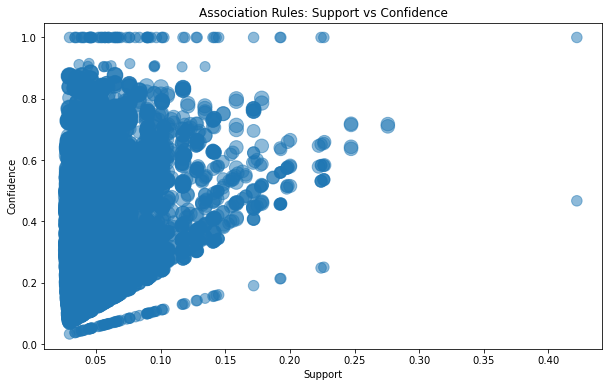

In [115]:
import matplotlib.pyplot as plt

# Filter rules by lift to focus on the most interesting rules
rules_lift = rules[rules['lift'] > 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(rules_lift['support'], rules_lift['confidence'], s=rules_lift['lift']*100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()


- Targeted Marketing: Utilize high confidence, low support rules for targeted marketing to niche segments, offering personalized bundles and promotions.
- Broad Campaigns: Implement marketing strategies based on rules with high support for broad campaigns that appeal to a large customer base.
- Priority Rules: Focus on rules with larger markers (higher lift) for high-impact marketing efforts and service development, as these rules indicate stronger associations.

Recommendations
- Offer bundled packages that include phone service and multiple lines at a discounted rate. Promote these bundles to new customers and those currently only subscribed to phone service.
- Create security-focused bundles that include online security services and multiple lines. Highlight the added value of enhanced security for multiple devices.
- Offer comprehensive protection bundles that combine online backup, device protection, and multiple lines. 
- Use the association rules to identify cross-selling opportunities. For example, target customers who have phone service but not multiple lines with promotions for adding multiple lines.
- Send personalized offers to customers based on their existing subscriptions. For instance, offer discounts on tech support to customers who already have multiple lines.
- Implement loyalty programs that reward customers for subscribing to multiple services. Offer exclusive benefits to customers who maintain their subscriptions for extended periods.
- Provide dedicated support for customers with multiple services. Ensure that they receive prompt and effective assistance, reinforcing their decision to subscribe to multiple services.

Next steps
- Use the insights from the association rules to design and launch targeted marketing campaigns.
- Track the performance of the campaigns to see which strategies yield the best results.
- Continuously refine your marketing and retention strategies based on customer feedback and campaign performance data.

# 3. Churn Prediction

In [53]:
data = pd.read_csv('LTV Tagged Customers.csv')

In [54]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'ZipCode' ,'LTV_Segment', 'State'], axis=1)

In [55]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [56]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'CustomerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [57]:
# Split the data into features and target variable
X = data.drop(['Churn', 'CustomerID'], axis=1)
y = data['Churn']

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

Confusion Matrix:


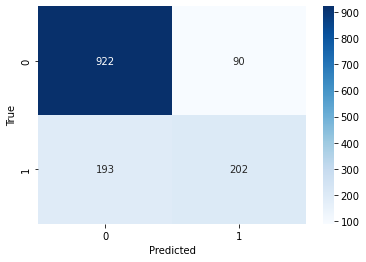

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.69      0.51      0.59       395

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score: 0.8391216790914094


In [63]:
# Confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

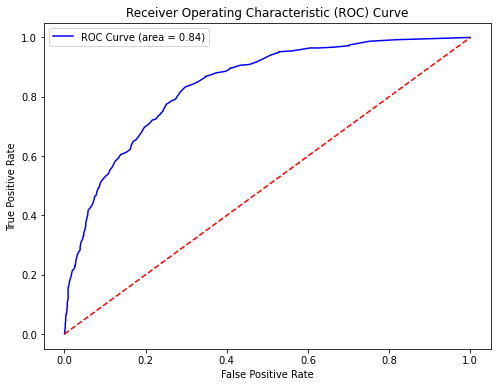

In [64]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

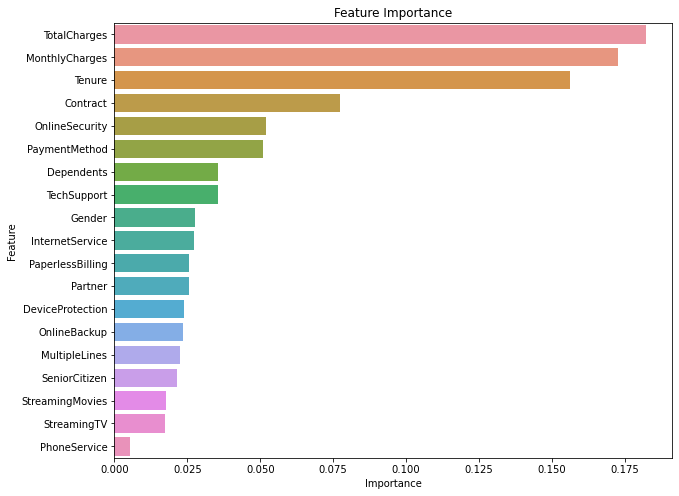

In [65]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


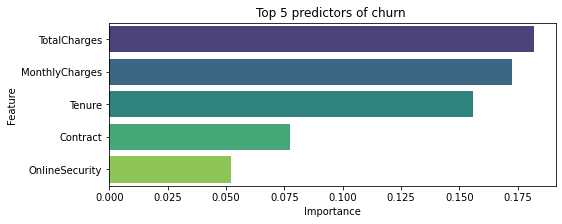

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Plot feature importance
plt.figure(figsize=(8, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Top 5 predictors of churn ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [67]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [68]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [69]:
# Predictions
y_pred_xgb = best_model.predict(X_test)
y_pred_prob_xgb = best_model.predict_proba(X_test)[:, 1]

In [70]:
# Evaluation Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)


print("XGBoost Regression MSE:", mse_xgb)
print("XGBoost Regression R^2:", r2_xgb)
print("XGBoost ROC AUC Score:", roc_auc_xgb)

XGBoost Regression MSE: 0.1812366737739872
XGBoost Regression R^2: 0.10245409516185522
XGBoost ROC AUC Score: 0.8692462600690449


Confusion Matrix:


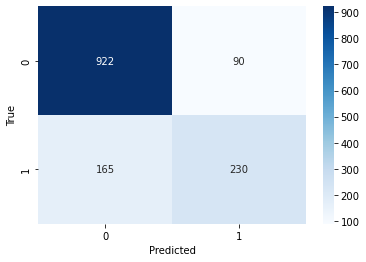

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1012
           1       0.72      0.58      0.64       395

    accuracy                           0.82      1407
   macro avg       0.78      0.75      0.76      1407
weighted avg       0.81      0.82      0.81      1407

ROC AUC Score: 0.8692462600690449


In [112]:
# Confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)
print("ROC AUC Score:", roc_auc)

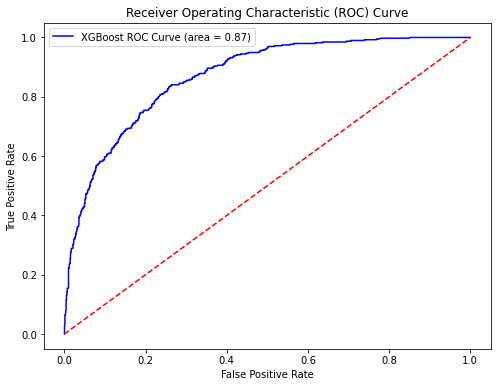

In [71]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost ROC Curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The XGBoost model's performance, as shown by the MSE (0.181) and R² (0.102), indicates that while it has a relatively high ROC AUC score (0.869), its regression metrics suggest it may not be the best fit for predicting the exact values of TotalCharges. 

The model can be further refined by feature engineering, further hyperparameter tuning, and if the class imbalance is addressed.

Recommendations
- Customer Engagement Programs: Implement onboarding and engagement initiatives for new customers, including welcome offers, regular check-ins, and personalized support, to reduce early churn.
- Service Bundling: Create bundled packages that include online security, backup, device protection, and tech support to enhance perceived value and reduce churn among multiple line and high-paying customers.
- Flexible Pricing Plans: Introduce à la carte pricing options and loyalty programs to reward long-term customers and offer value-added services, ensuring high-paying customers feel they get value for their money.
- Proactive Feedback Collection: Regularly collect and act on customer feedback to address issues early, and provide multi-channel support to cater to different customer preferences.
- Incentivize Long-term Contracts: Encourage longer-term contracts by highlighting cost savings and additional benefits, and offer incentives for customers to switch from month-to-month contracts to reduce churn.